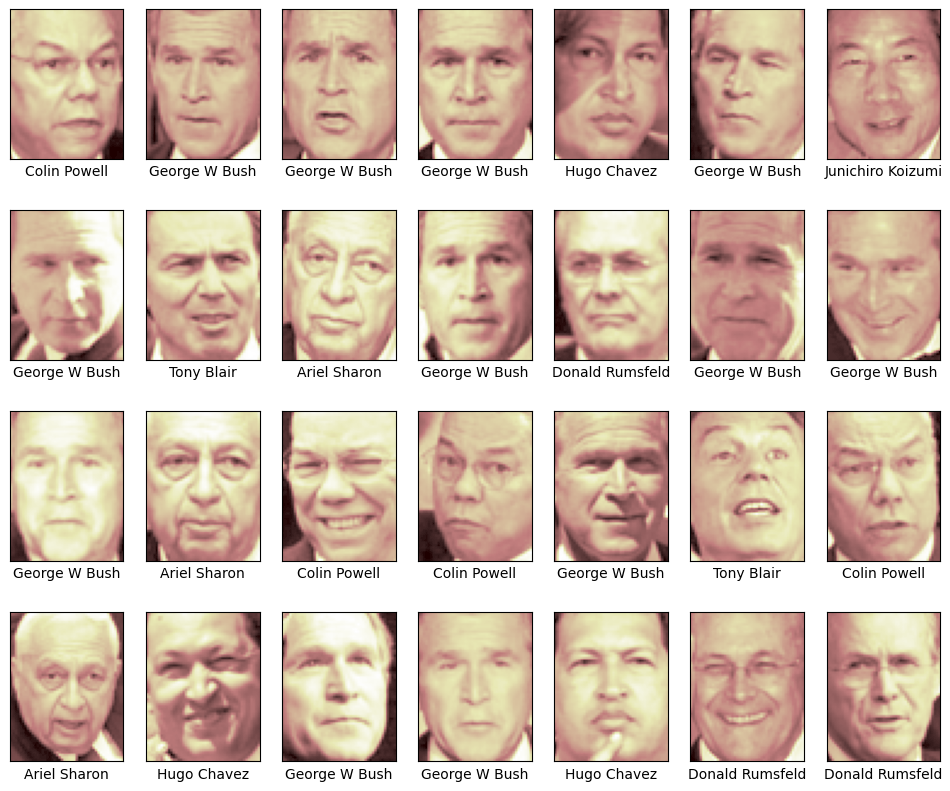

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people # this will download␣

faces = fetch_lfw_people(min_faces_per_person=60) # you don't already have␣

fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='pink')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

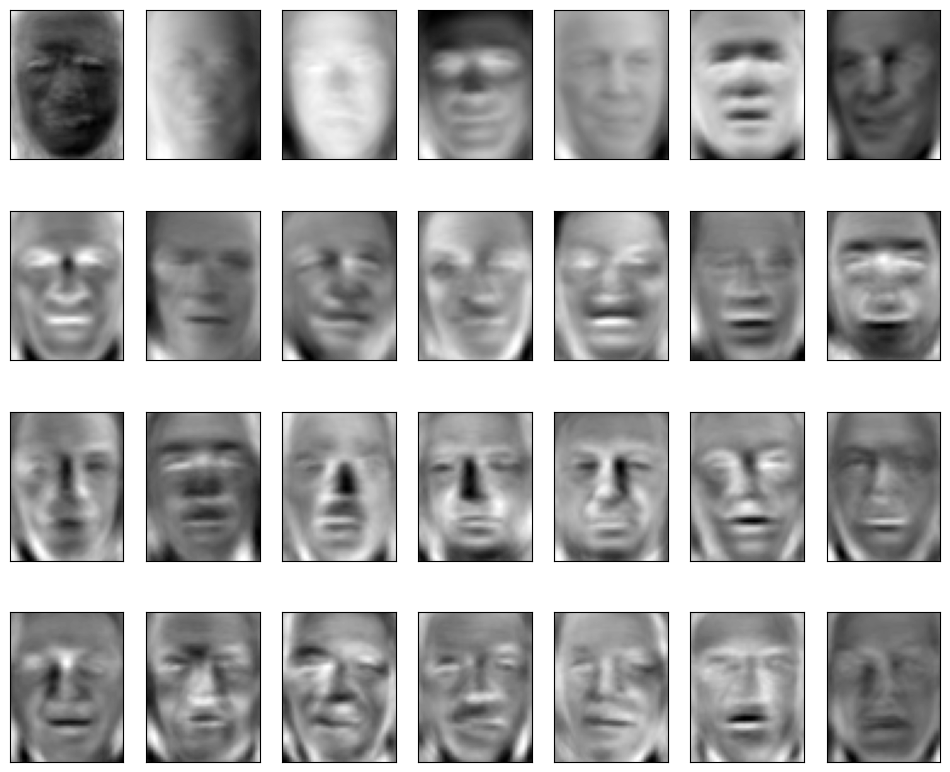

In [ ]:
from sklearn.decomposition import PCA

#  PCA on the dataset
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(faces.data)

#  eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))

# Creating a subplot to display the first 28 eigenfaces
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='gray')
    axi.set(xticks=[], yticks=[])


In [ ]:

n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(faces.data)

# cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# number of dimensions (N) to achieve 5% relative error
threshold = 0.05
N = np.searchsorted(cumulative_variance_ratio, 1 - threshold) + 1

print("Number of dimensions (N) for 5% relative error:", N)


Number of dimensions (N) for 5% relative error: 151
